# What sells a car?


Hello, this is a project by Mikhail Mussel and is aimed to **determine which factors influence price of a car**. 

I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day. I'll need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

Starting off let's import some libraries that will help us along the way.

In [1]:
# Loading all the libraries

import pandas as pd
import datetime as dt 
import warnings
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

warnings.filterwarnings("ignore")

### Loading data

Let's store our data and have a look at it.

In [2]:
# Loading the data file into a DataFrame

try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

### Exploring initial data

The dataset contains the following fields:
- `price` - the cost of the vehicle
- `model_year` 
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

Most of the columns are self-explanatory in their purpose.

In [3]:
# printing the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# printing a sample of data

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# Checking for duplicated data

df.duplicated().sum()

0

In [6]:
# Displying ammount of missing data per column

df.isna().sum().sort_values()

price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
model_year       3619
cylinders        5260
odometer         7892
paint_color      9267
is_4wd          25953
dtype: int64

We can see the number of missing values per column in our data. Affected columns are:
- 'model_year' (year when the car was manifactured, number value)
- 'cylinders' (number value)
- 'odometer' (the vehicle's milage when the ad was published, number value)
- 'paint_color' (string value)
- 'is_4wd' (boolean value)


### Conclusions and further steps

We have a great ammount of missing values in the boolean column 'is_4wd', we can easily fill missing values in it with 0 or False since we presume that rest of the values are 1s which is True for our purpose.

Let's deal with 'is_4wd' column first, then 'paint_color' we can fill missing values with 'colorless' which could help cleaning our data.

## Treat missing values (if any)

In [7]:
# Checking for unique values in the column

df.is_4wd.unique()

array([ 1., nan])

In [8]:
# Filling missing values and resaving column as integer type

df['is_4wd'] = df['is_4wd'].fillna(0).astype(int).apply(lambda x: True if x == 1 else False)

After dealing with our boolean column we still have some columns that are a problem to our research.

We can replace missing values in 'paint_color' with a string 'colorless'. That will give us some additional information about our data.

In [9]:
# Filling missing values for car color

df['paint_color'] = df['paint_color'].fillna('colorless')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


To find appropriate values to fill in column 'model_year' we can group our data and apply a function that grabs most common value for group combination.

In [11]:
# Replacing missing values in 'model_year' with mode value

df['model_year'] = df.groupby(by=['model', 'condition'])['model_year'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [12]:
# Displying ammount of missing data per column 

df.isna().sum().sort_values()

price              0
model              0
condition          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
model_year         6
cylinders       5260
odometer        7892
dtype: int64

We can use similar method to help us find most common values in our 'cylinders' column.

In [13]:
# Replacing missing values in 'cylinders' with mode value

df['cylinders'] = df.groupby(by=['model', 'model_year'])['cylinders'].transform(lambda grp: grp.fillna(grp.median()))

In [14]:
# Displying ammount of missing data per column 

df.isna().sum().sort_values()

price              0
model              0
condition          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
model_year         6
cylinders         32
odometer        7892
dtype: int64

We got rid of some ammount of missing values in our data, to help us fill missing values in 'odometer' we need to know how old was the car at the time of ad post.

But before we should fix some other issues with our data.

## Fix data types

We fixed the 'is_4wd' column, let's change 'date_posted'.

In [15]:
# Converting string object type to datetime

df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [16]:
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,colorless,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79


## Enrich data

To make things easier let's make some dictionaries and add a few columns as part of the task.

In [17]:
# Creating a dictionary for weekdays

weekday = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [18]:
# Adding datetime values for when the ad was placed

df['day_of_the_week'] = df['date_posted'].dt.weekday.apply(lambda x: weekday[x])
df['month'] = df['date_posted'].dt.month
df['year'] = df['date_posted'].dt.year

In [19]:
df.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_the_week,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,colorless,True,2018-06-23,19,Saturday,6,2018
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018


In [20]:
# Adding the vehicle's age when the ad was placed

df['age'] = df['year'].astype(float) - df['model_year'] 

With this solution we might run into an issue where if the ad was published in the same year as that car was made we will have 'age' value as 0.

We don't want it to be 0 so we could just replace every 0 value with 1.

In [21]:
df['age'] = df['age'].replace(0,1)

Now that we have vehicle's age parameter we can fill some missing values for vehicle mileage.

In [22]:
# We needded additional column 'age' to complete filling missing values

df['odometer'] = df.groupby(by=['age'])['odometer'].transform(lambda grp: grp.fillna(grp.median()))

In [23]:
# Displying ammount of missing data per column 

df.isna().sum().sort_values()

price               0
month               0
day_of_the_week     0
days_listed         0
date_posted         0
is_4wd              0
paint_color         0
year                0
type                0
fuel                0
condition           0
model               0
transmission        0
model_year          6
age                 6
odometer            8
cylinders          32
dtype: int64

Considering the ammount of left up missing values we can make a copy of our dataset and keep working on modified dataframe with dropped missing values.

After that we need to add a column with average mileage per year and also transform 'condition' column from string to numeric via dictionaries.

In [24]:
original_df = df.copy()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51492 non-null  int64         
 1   model_year       51492 non-null  float64       
 2   model            51492 non-null  object        
 3   condition        51492 non-null  object        
 4   cylinders        51492 non-null  float64       
 5   fuel             51492 non-null  object        
 6   odometer         51492 non-null  float64       
 7   transmission     51492 non-null  object        
 8   type             51492 non-null  object        
 9   paint_color      51492 non-null  object        
 10  is_4wd           51492 non-null  bool          
 11  date_posted      51492 non-null  datetime64[ns]
 12  days_listed      51492 non-null  int64         
 13  day_of_the_week  51492 non-null  object        
 14  month            51492 non-null  int64

Let's dive a little bit deeper in our 'odometer' column grouped with 'age' and 'condition'. We can use in-line function like this to have display mode, median as well as total ammount of values in our group. This might provide some helpful insight.

In [25]:
# Diplaying mileage values by group

df.groupby(['age','condition'])['odometer'].agg(lambda x: list([pd.Series.mode(x),x.median(),x.count()])).reset_index()

,age,condition,odometer
0,1.0,excellent,"[[28936.0], 28936.0, 2216]"
1,1.0,fair,"[[73095.0], 73095.0, 3]"
2,1.0,good,"[[28936.0], 28936.0, 1136]"
3,1.0,like new,"[[28936.0], 28936.0, 1096]"
4,1.0,new,"[[7.0], 1428.0, 89]"
...,...,...,...
251,63.0,excellent,"[[47180.0], 47180.0, 1]"
252,71.0,like new,"[[4000.0], 4000.0, 1]"
253,82.0,excellent,"[[30000.0], 30000.0, 1]"
254,110.0,excellent,"[[169328.0], 169328.0, 1]"


Let's create a new column with values from our other columns.

In [26]:
# Add the vehicle's average mileage per year

df['avg_mil_per_year'] = df['odometer'] / df['age']

In [27]:
df.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_the_week,month,year,age,avg_mil_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,colorless,True,2018-06-23,19,Saturday,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6.0,18333.333333


We can use a dictionaries in powerful ways. Combined with in-line functions we can replace string values with numeric for our case.

In [28]:
# Creating dictionary for car conditions

car_condition = {
    'salvage': 0,
    'fair': 1,
    'good': 2,
    'excellent': 3,
    'like new': 4,
    'new': 5
}

In [29]:
df.condition.value_counts()

excellent    24762
good         20135
like new      4741
fair          1604
new            137
salvage        113
Name: condition, dtype: int64

In [30]:
# It might help to replace the condition values with something that can be manipulated more easily

df['condition'] = df['condition'].apply(lambda x: car_condition[x])

In [31]:
df.head(4)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_the_week,month,year,age,avg_mil_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,colorless,True,2018-06-23,19,Saturday,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,157000.0,automatic,pickup,colorless,False,2019-03-22,9,Friday,3,2019,16.0,9812.500000


We want to replace string values with numeric since we can get more data that way.

## Check clean data

Let's do another look at our data we have so far.

In [32]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51492 non-null  int64         
 1   model_year        51492 non-null  float64       
 2   model             51492 non-null  object        
 3   condition         51492 non-null  int64         
 4   cylinders         51492 non-null  float64       
 5   fuel              51492 non-null  object        
 6   odometer          51492 non-null  float64       
 7   transmission      51492 non-null  object        
 8   type              51492 non-null  object        
 9   paint_color       51492 non-null  object        
 10  is_4wd            51492 non-null  bool          
 11  date_posted       51492 non-null  datetime64[ns]
 12  days_listed       51492 non-null  int64         
 13  day_of_the_week   51492 non-null  object        
 14  month             5149

In [33]:
df.isna().sum().sort_values()

price               0
year                0
month               0
day_of_the_week     0
days_listed         0
date_posted         0
is_4wd              0
paint_color         0
type                0
transmission        0
odometer            0
fuel                0
cylinders           0
condition           0
model               0
model_year          0
age                 0
avg_mil_per_year    0
dtype: int64

In [34]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_the_week,month,year,age,avg_mil_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,colorless,True,2018-06-23,19,Saturday,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,157000.0,automatic,pickup,colorless,False,2019-03-22,9,Friday,3,2019,16.0,9812.500000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,6,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,12,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,1,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,colorless,True,2018-07-16,19,Monday,7,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,2,2019,11.0,13381.000000


## Study core parameters

To help us learn more from our data we need to plot histograms

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [35]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    df[parameter].hist()
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    
    ninety_eight = np.percentile(df[parameter], 98)
    two = np.percentile(df[parameter], 2)
    print('---------------------------------------')
    print('min border:',two)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('We have',len(df[(df[parameter]<two)|(df[parameter]>ninety_eight)]),"values that might be outliers!")

The histogram of: price


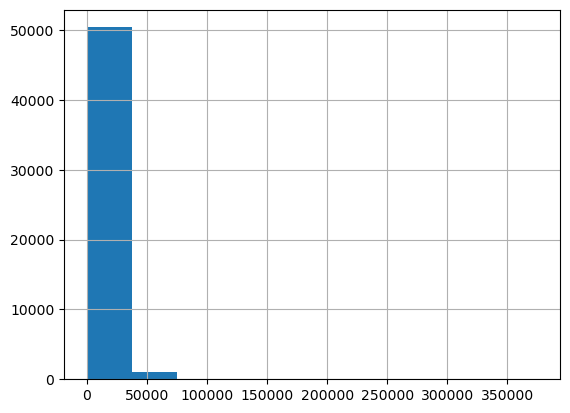

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51492.000000
mean      12132.561679
std       10035.120469
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16850.250000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.0
max border: 37995.0
---------------------------------------
We have 2054 values that might be outliers!


In [36]:
distribution_percentile('price')

Right away we can notice our minimum is 1 which in the case of price correlates to an ad of a car being posted for 1$. The max border at 38k looks miniscule compared with borderless max. Quite possibly that the values over our max border are normal car prices.

Let's move on for now, and consider everything after the initial display.

The histogram of: age


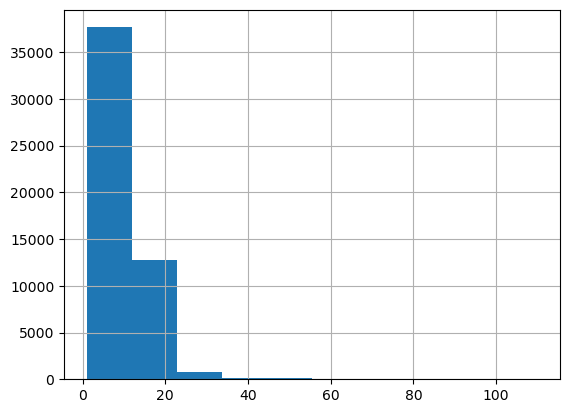

The distribution is skewed to the right
---------------------------------------
Statistics on: age
count    51492.000000
mean         8.483784
std          6.109164
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64
---------------------------------------
min border: 1.0
max border: 23.0
---------------------------------------
We have 880 values that might be outliers!


In [37]:
distribution_percentile('age')

Here we can see the value of our maximum border to be 23 which correlates to the vehicle's age at the time of posting. But the maximum value outside the upper border has value of 110. It's either a rarity car or something else.

Doing a quick count of values for age of the vehicle to possibly notice any abnormalties.

In [38]:
df.age.value_counts()

1.0     4550
5.0     3915
4.0     3822
6.0     3806
7.0     3745
        ... 
60.0       2
63.0       1
71.0       1
59.0       1
82.0       1
Name: age, Length: 63, dtype: int64

The histogram of: odometer


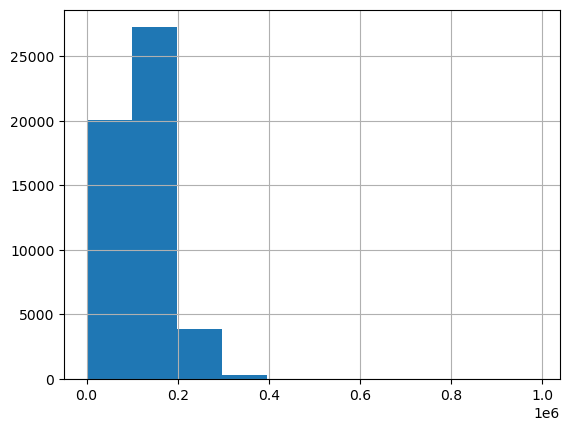

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     51492.000000
mean     115101.064486
std       62092.042430
min           0.000000
25%       73710.500000
50%      114400.000000
75%      152000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 3915.0
max border: 250825.0
---------------------------------------
We have 2058 values that might be outliers!


In [39]:
distribution_percentile('odometer')

Looking at the statistics on mileage we see the minimum at 0 which means that the car is being sold without being used in past at all. We can see a big dispersion values from 0 to 100k, our set borders seem reasonable.

The histogram of: cylinders


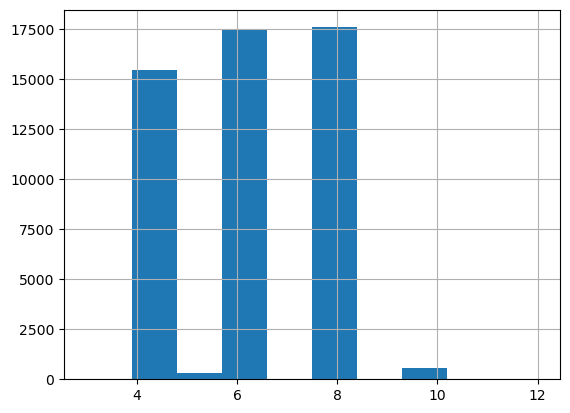

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51492.000000
mean         6.119708
std          1.656460
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
We have 608 values that might be outliers!


In [40]:
distribution_percentile('cylinders')

This looks like a categorical value, all values should be kept.

The histogram of: condition


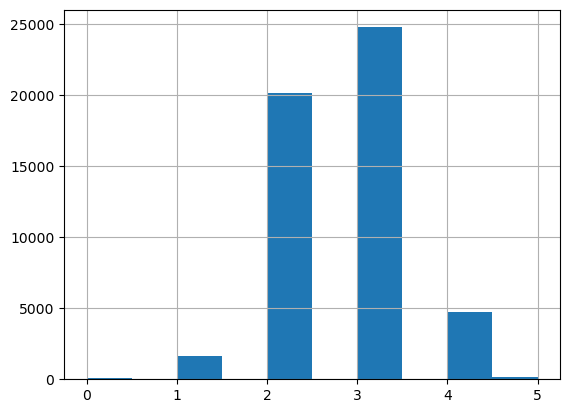

The distribution is skewed to the left
---------------------------------------
Statistics on: condition
count    51492.000000
mean         2.637478
std          0.711819
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
We have 250 values that might be outliers!


In [41]:
distribution_percentile('condition')

Same goes for this column. It's also categorical.

We can create a dataframe with the names of columns as a parameter and with it's borders as the values. 

In [42]:
# Creating borders

border_list=[]
for parameter in ['price','age','odometer', 'days_listed']:
    ninety_eight = np.percentile(df[parameter], 98)
    two = np.percentile(df[parameter], 2)
    border_list.append([parameter,two,ninety_eight])

In [43]:
# Creating separate dataframe with expected border values in our columns

border_data = pd.DataFrame(border_list,columns=['parameter','min_border','max_border'])
border_data

,parameter,min_border,max_border
0,price,371.0,37995.0
1,age,1.0,23.0
2,odometer,3915.0,250825.0
3,days_listed,4.0,115.0


Now we have numeric values for our borders, let's save them in variables to allow further usage.

## Study and treat outliers



In [44]:
# Setting borders for price

actual_price_min=border_data[border_data.parameter=='price']['min_border'].iloc[0]

actual_price_max=border_data[border_data.parameter=='price']['max_border'].iloc[0]

In [45]:
# Setting borders for age

actual_age_min=border_data[border_data.parameter=='age']['min_border'].iloc[0]

actual_age_max=border_data[border_data.parameter=='age']['max_border'].iloc[0]

In [46]:
# Setting borders for odometer

actual_odometer_min=border_data[border_data.parameter=='odometer']['min_border'].iloc[0]

actual_odometer_max=border_data[border_data.parameter=='odometer']['max_border'].iloc[0]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51492 non-null  int64         
 1   model_year        51492 non-null  float64       
 2   model             51492 non-null  object        
 3   condition         51492 non-null  int64         
 4   cylinders         51492 non-null  float64       
 5   fuel              51492 non-null  object        
 6   odometer          51492 non-null  float64       
 7   transmission      51492 non-null  object        
 8   type              51492 non-null  object        
 9   paint_color       51492 non-null  object        
 10  is_4wd            51492 non-null  bool          
 11  date_posted       51492 non-null  datetime64[ns]
 12  days_listed       51492 non-null  int64         
 13  day_of_the_week   51492 non-null  object        
 14  month             5149

In [48]:
# Removing outliers in price column

df=df[(df.price>actual_price_min)&(df.price<actual_price_max)]

In [49]:
# Removing outliers in age column

df=df[(df.age>actual_age_min)&(df.age<actual_age_max)]

In [50]:
# Removing outliers in odometer column

df=df[(df.odometer>actual_odometer_min)&(df.odometer<actual_odometer_max)]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43240 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             43240 non-null  int64         
 1   model_year        43240 non-null  float64       
 2   model             43240 non-null  object        
 3   condition         43240 non-null  int64         
 4   cylinders         43240 non-null  float64       
 5   fuel              43240 non-null  object        
 6   odometer          43240 non-null  float64       
 7   transmission      43240 non-null  object        
 8   type              43240 non-null  object        
 9   paint_color       43240 non-null  object        
 10  is_4wd            43240 non-null  bool          
 11  date_posted       43240 non-null  datetime64[ns]
 12  days_listed       43240 non-null  int64         
 13  day_of_the_week   43240 non-null  object        
 14  month             4324

## Study core parameters without outliers

Let's call our function again on the same columns and compare the results.

The histogram of: price


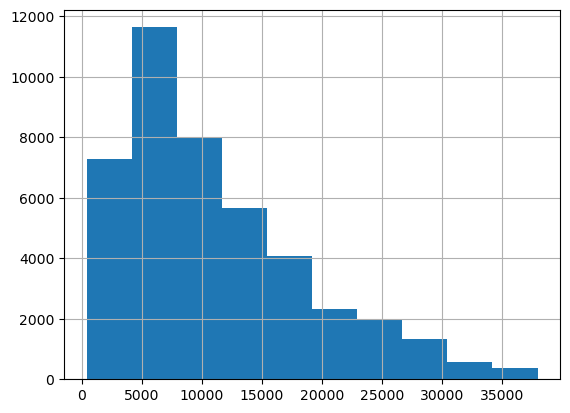

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count    43240.000000
mean     11109.355065
std       7647.159974
min        399.000000
25%       5100.000000
50%       8977.000000
75%      15000.000000
max      37990.000000
Name: price, dtype: float64
---------------------------------------
min border: 1599.0
max border: 30990.0
---------------------------------------
We have 1727 values that might be outliers!


In [52]:
distribution_percentile('price')

This histogram shows us smoother distribution for the price of vehicle. The Y axis represents the counts for X axis values of price. We notice a peak at the price around 4-7 thousand dollars which makes sense for our platform being an ad posting board for used cars. As the price increases the count decreases.

This tells us that people usually sell their cars at a price lower than 20k.

The histogram of: age


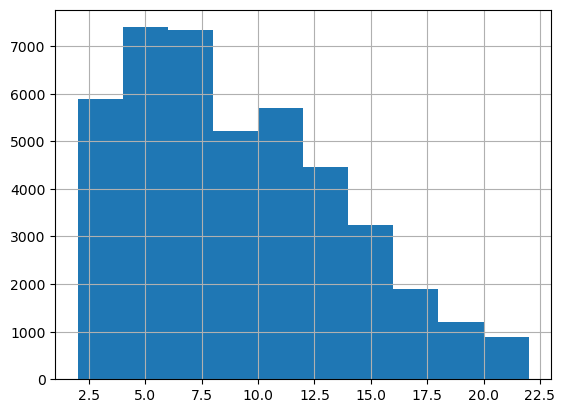

The distribution is skewed to the right
---------------------------------------
Statistics on: age
count    43240.000000
mean         8.655412
std          4.680548
min          2.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         22.000000
Name: age, dtype: float64
---------------------------------------
min border: 2.0
max border: 20.0
---------------------------------------
We have 496 values that might be outliers!


In [53]:
distribution_percentile('age')

Our new histogram for age column has similar look as the price, meaning we have a good ammount of values for lower half and then it goes down as the age increases. We can say that most people are selling their cars if it has more than 10-14 years of service.

The histogram of: odometer


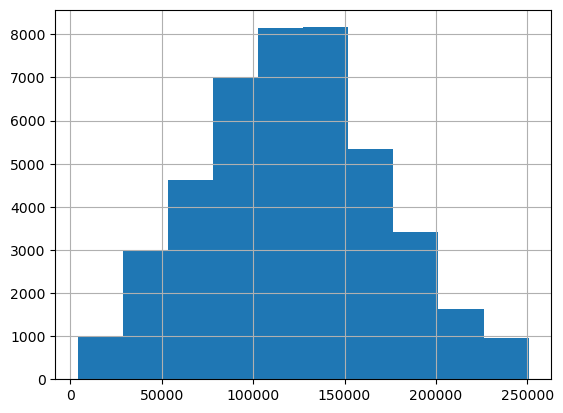

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     43240.000000
mean     121894.093270
std       49095.780727
min        4100.000000
25%       86689.750000
50%      121000.000000
75%      154846.500000
max      250737.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 27000.0
max border: 228548.58000000005
---------------------------------------
We have 1711 values that might be outliers!


In [54]:
distribution_percentile('odometer')

Looking at the mileage column we see the spike at 100k miles but it's also skewed to the right as we have more cars with bigger mileage.

The histogram of: days_listed


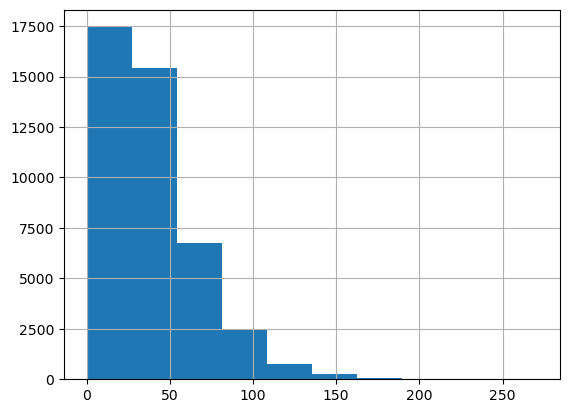

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    43240.000000
mean        39.582979
std         28.248699
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
---------------------------------------
min border: 4.0
max border: 115.0
---------------------------------------
We have 1574 values that might be outliers!


In [55]:
distribution_percentile('days_listed')

Min border at 4 days seems agreeable since the absolute minimum value is at 0 and though we're setting up max borders at 115 with max absolute value at 271 with total possible outliers at 1576 which almost completely filled with values over our max border.

## Ads lifetime

Let's plot a histogram for 'days_listed' column, but first let's cut the ouliers in this column aswell.

In [56]:
# Removing outliers in price column

actual_days_listed_min=border_data[border_data.parameter=='days_listed']['min_border'].iloc[0]

actual_days_listed_max=border_data[border_data.parameter=='days_listed']['max_border'].iloc[0]

df=df[(df.days_listed>actual_days_listed_min)&(df.days_listed<actual_days_listed_max)]

The histogram of: days_listed


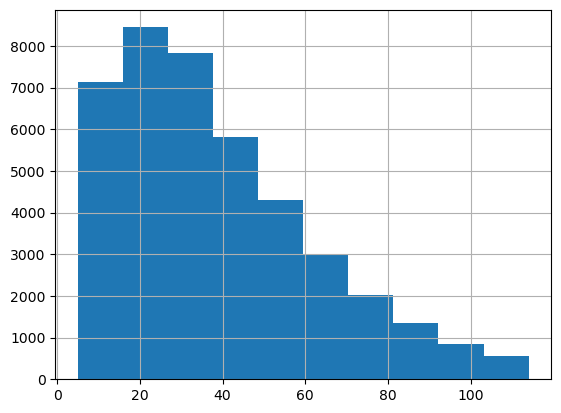

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    41277.000000
mean        38.418126
std         23.952042
min          5.000000
25%         20.000000
50%         33.000000
75%         52.000000
max        114.000000
Name: days_listed, dtype: float64
---------------------------------------
min border: 6.0
max border: 100.0
---------------------------------------
We have 1177 values that might be outliers!


In [57]:
distribution_percentile('days_listed')

Our median is 33 and mean is 39.582523. We can see that we most ads stay listed on the board for around 1-2 mounths, according to the percentiles. But we do have some ads that stay up for great ammount of time.

This boxplot below shows us that distribution.

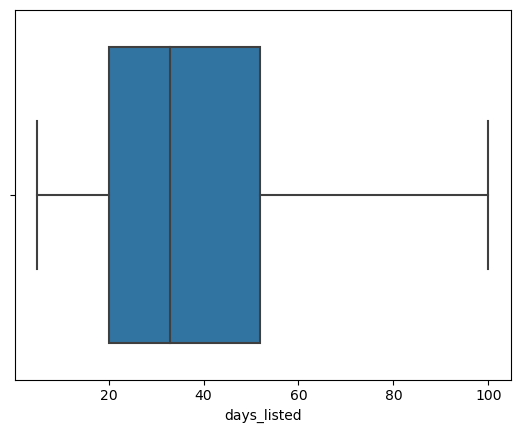

In [58]:
sns.boxplot(x=df.days_listed,showfliers = False)
plt.show()

## Average price per each type of vehicle

We need to see our most represented vehicles in our data. Let's create a variable 'types' that has a count and average value for each type of cars in descending order.

In [59]:
# Creating separate dataframe with vehicle types, their average prices and amount of offers

types = df.groupby(['type'])['price'].agg(['count', 'mean']).reset_index().sort_values(by='count', ascending=False)

In [60]:
types

,type,count,mean
0,SUV,10180,10298.931532
9,sedan,10146,6607.496353
10,truck,9721,15560.578130
8,pickup,5322,14594.510522
3,coupe,1527,12649.666012
12,wagon,1306,8840.110260
5,mini-van,1010,7448.833663
4,hatchback,857,6525.578763
11,van,533,10389.206379
2,convertible,294,13138.435374


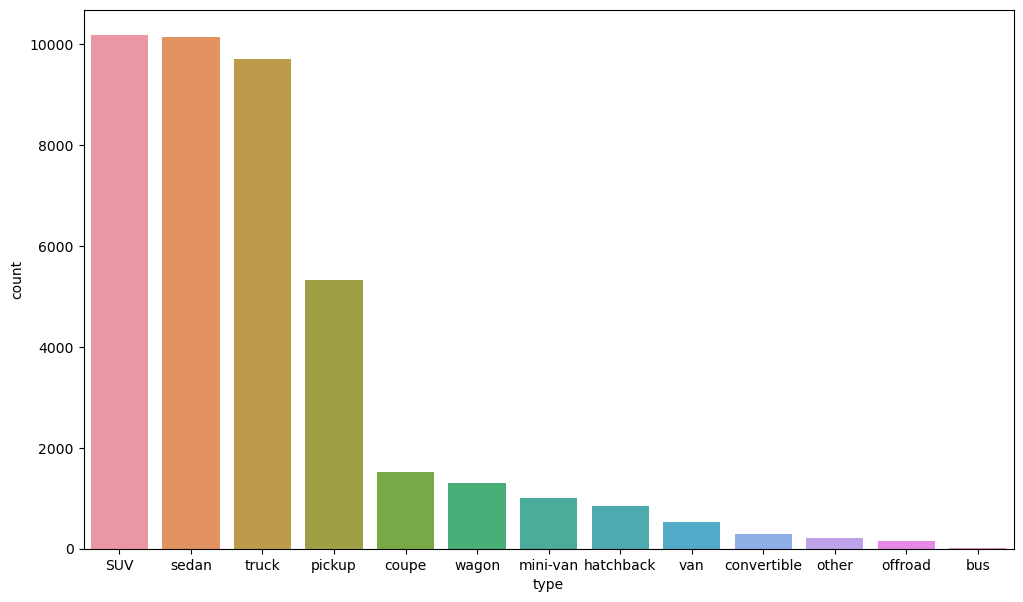

In [61]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(x='type', y='count', data=types)
plt.show()

In [62]:
top = list(types.head(2)['type'])
top

['SUV', 'sedan']

In [63]:
new_data=df[df.type.isin(top)]

## Price factors

Given the results of our research above we determined our two most common types of vehicles for second-hand sale - SUVs and sedans, which quite frankly are typically most used or seen cars in everyday life. We will use data for those types to get a better sample size of data for now analytical part of out work to find out **what sells a car**.

I made a separate dataset only with SUV and sedan types of cars and now we will split them to build graphs for each of the datasets. For categorical variables I will use boxplots and scatterplots for the rest.

Also will provide correlation matrix for both.

In [64]:
# Creating a DF only with SUVs

SUV = new_data[new_data['type']=='SUV']

Let's also make a separate SUV dataset with only columns that we want to use for scatterplotting.

In [65]:
for_scatter_suv = SUV[['price', 'condition', 'age', 'odometer']]

In [66]:
for_scatter_suv

,price,condition,age,odometer
0,9400,2,7.0,145000.0
7,15990,3,6.0,109473.0
8,11500,3,6.0,104174.0
9,9200,3,11.0,147191.0
14,12990,3,10.0,132285.0
...,...,...,...,...
51484,7999,3,8.0,109363.0
51494,7999,3,10.0,95021.0
51496,4999,3,16.0,177901.0
51500,6995,3,6.0,157000.0


In [67]:
# Showing correlation matrix for SUVs

for_scatter_suv.corr()

,price,condition,age,odometer
price,1.000000,0.261332,-0.605148,-0.611193
condition,0.261332,1.000000,-0.277820,-0.291667
age,-0.605148,-0.277820,1.000000,0.606760
odometer,-0.611193,-0.291667,0.606760,1.000000


<AxesSubplot:xlabel='transmission', ylabel='price'>

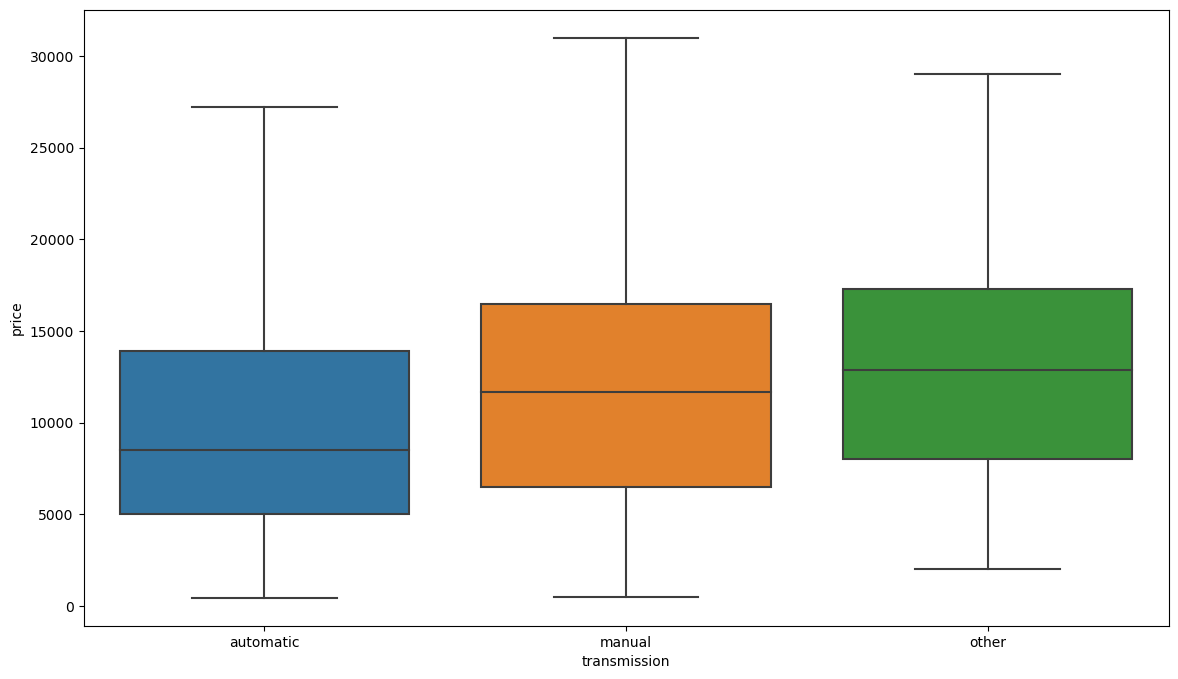

In [68]:
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=SUV,showfliers = False)

SUVs with automatic transmission are generally sold cheaper than manual but there are only 422 of those SUVs while automatic has almost 10k.

In [69]:
SUV.transmission.value_counts()

automatic    9672
manual        423
other          85
Name: transmission, dtype: int64

While automatic transmission is by far the most popular amongst SUV type vehicles the manual transmission has wider range of prices.

<AxesSubplot:xlabel='paint_color', ylabel='price'>

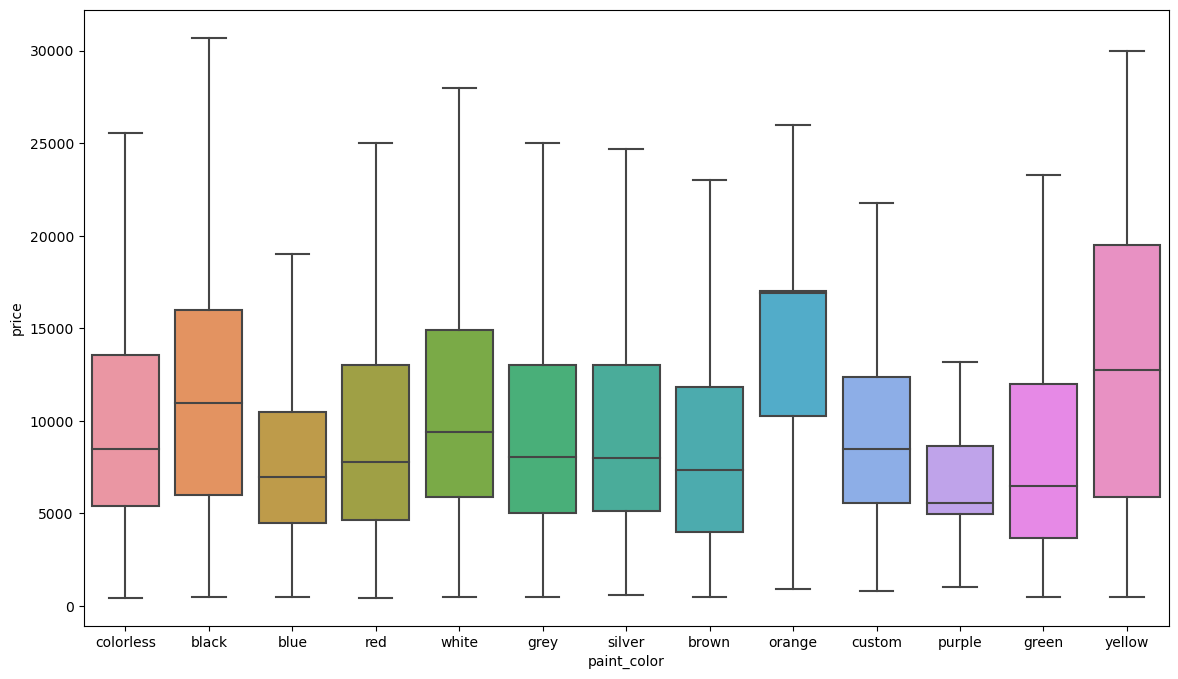

In [70]:
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=SUV,showfliers = False)

Here we see quite realistic price distribution for car colors. For some reason or another orange cars are not like the others. We can't say for sure why their typical price is higher than most of the others(Maybe it's an exotic sport model that never recieved a paint job). The yellow cars also are distinct from the rest it even has bigger typical price range than regular ol' black color vehicles.

In [71]:
SUV['paint_color'].value_counts()

colorless    1806
black        1762
white        1593
silver       1323
grey          990
blue          868
red           775
green         349
brown         326
custom        246
orange         70
yellow         40
purple         32
Name: paint_color, dtype: int64

Here we notice that yellow and orange colors have count less than 50 each so those cars should be ignored for the analysis.

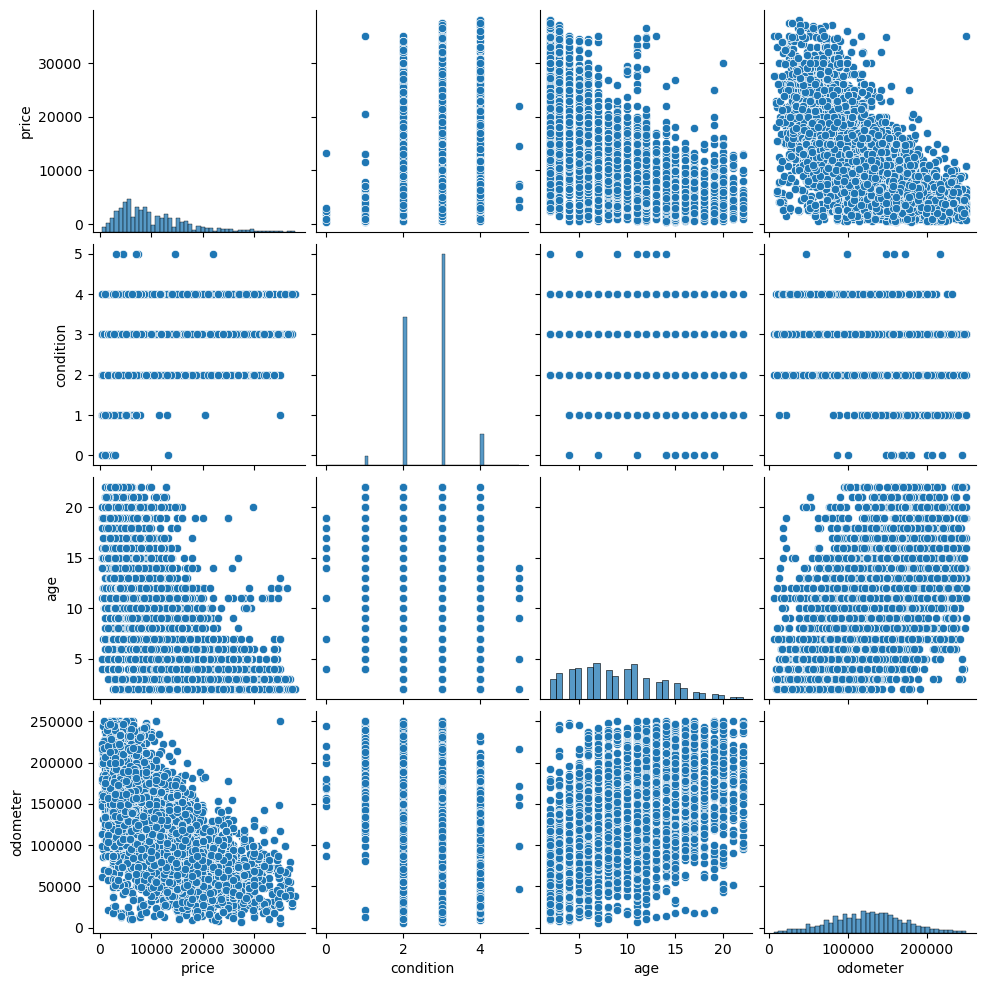

In [72]:
sns.pairplot(for_scatter_suv)

We can notice that no matter the mileage there's a wide range of price options for SUVs with mileage under 100k. Same goes for age and for condition to some extend, only conditions with grade 2-4 have almost complete price coverage.

In [73]:
# Creating a DF only with sedans

sedan = new_data[new_data['type']=='sedan']

In [74]:
for_scatter_sedan = sedan[['price', 'condition', 'age', 'odometer']]

In [75]:
for_scatter_sedan.corr()

,price,condition,age,odometer
price,1.000000,0.286016,-0.633218,-0.611462
condition,0.286016,1.000000,-0.263242,-0.285454
age,-0.633218,-0.263242,1.000000,0.587763
odometer,-0.611462,-0.285454,0.587763,1.000000


<AxesSubplot:xlabel='transmission', ylabel='price'>

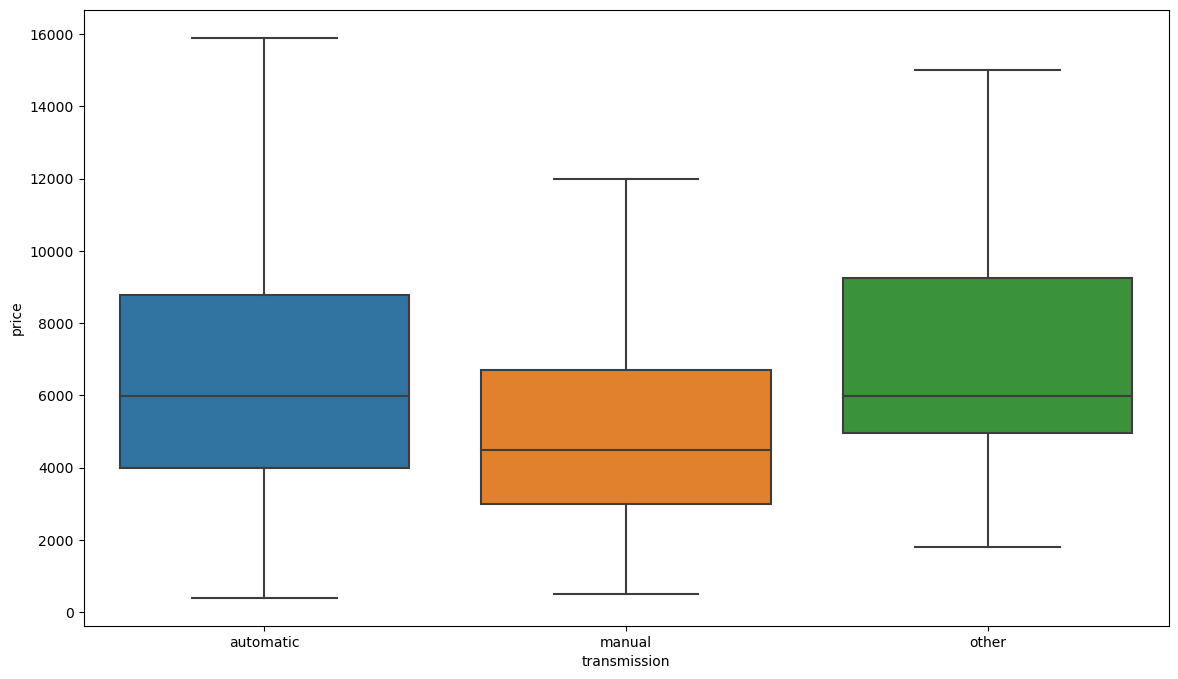

In [76]:
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=sedan,showfliers = False)

With sedan type vehicles things are different from SUVs, price scale is lower here. But relative to other types of transmission automatic is greater in numbers and is priced higher than other.

In [77]:
sedan.transmission.value_counts()

automatic    9594
manual        493
other          59
Name: transmission, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

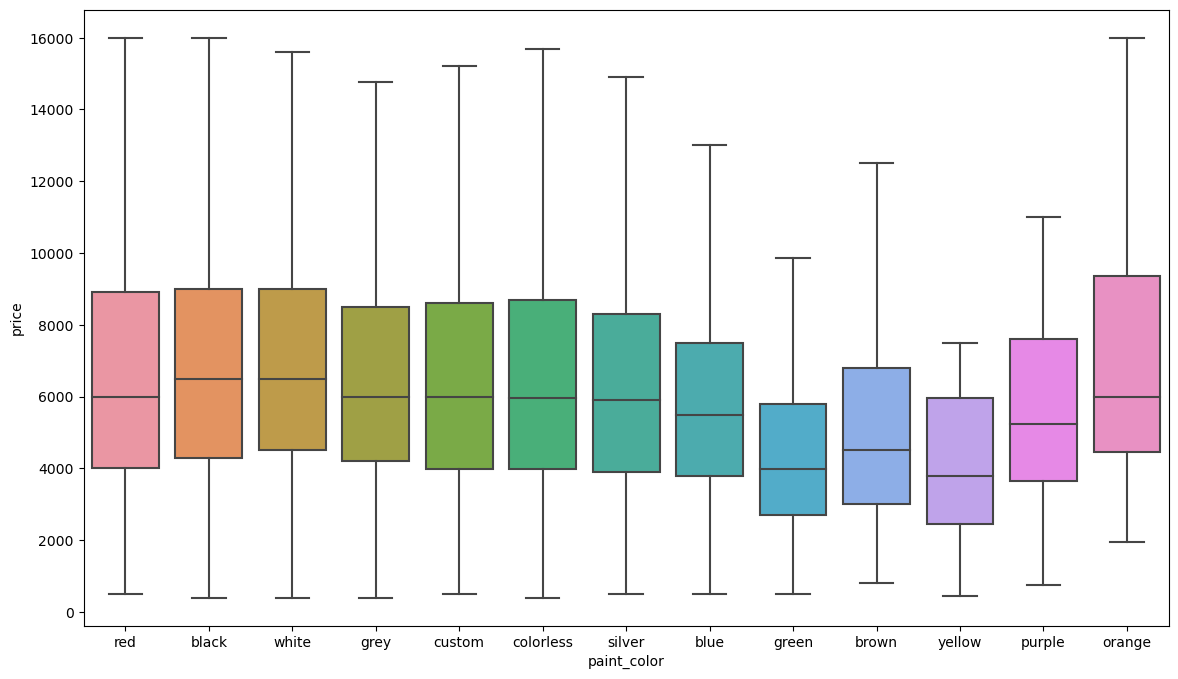

In [78]:
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=sedan,showfliers = False)

Pretty much the same situation in paint color of sedans, nothing we can really gather from this data.

In [79]:
sedan['paint_color'].value_counts()

colorless    1833
silver       1722
black        1477
grey         1373
white        1214
blue         1051
red           784
custom        235
brown         229
green         179
purple         22
yellow         20
orange          7
Name: paint_color, dtype: int64

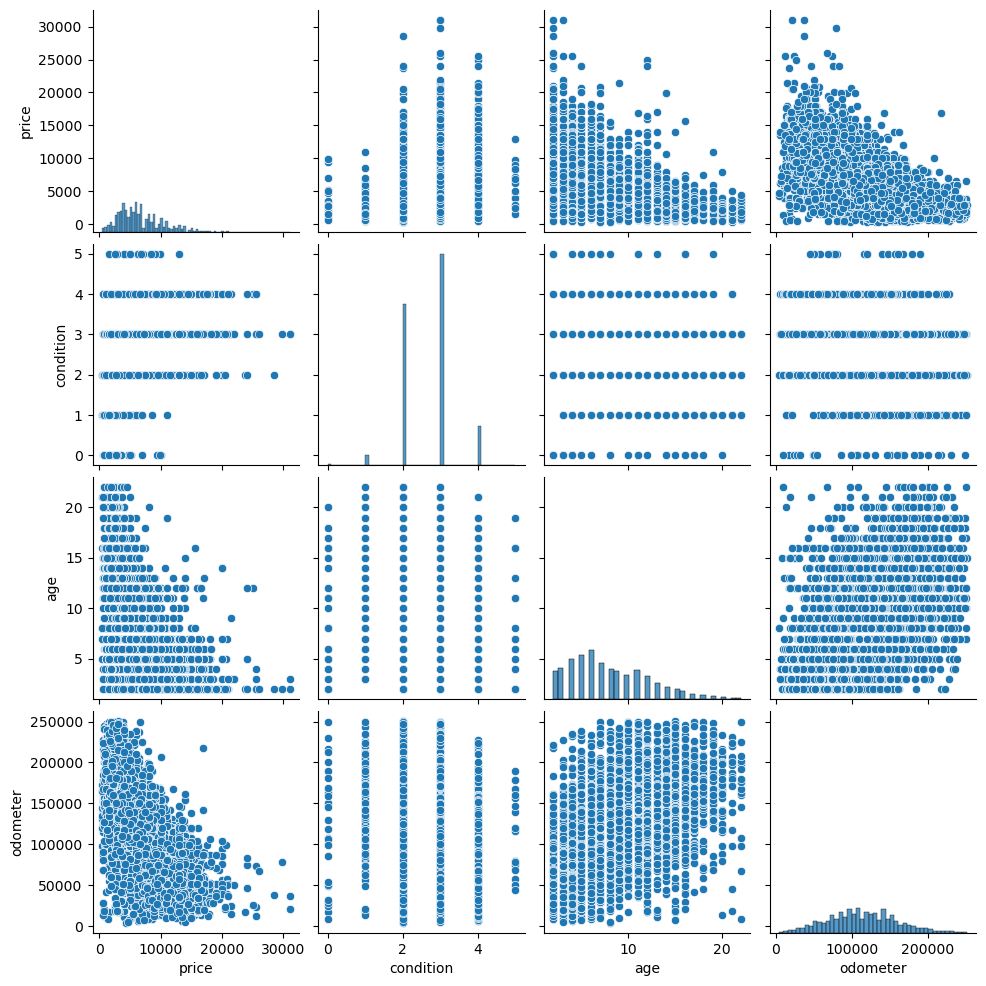

In [80]:
sns.pairplot(for_scatter_sedan)

This time we don't see that many expensive offers for lower mileage. The age to price relation shows us that there's less older sedan type vehicles than there's older SUV types. Also we have more density in condition with lower spread.

## General conclusion


At the start of this project I had a dataset with thousands of missing values in half the columns though there were no true or implicit duplicates(as we know of). We converted columns to other datatypes as well as created a few more columns in the process with the help of dictionaries. We created a function that builds a histogram with the name of the column in our data that uses percentile methods from NumPy. We identified clear outliers and removed them from our data. Then, using Seaborn we built barplots, boxplots and scatterplots to help us visualize our data. 

In the end we established that for SUVs and sedan types of a car that was published on our board are the most common types of vehicles and have tendency to be put up for bigger ammount of money if they:
a) In good condition;
b) Have less mileage;
c) Have beed manifactured in the recent years.

In [81]:
df.duplicated().sum()

0

In [82]:
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd              0
date_posted         0
days_listed         0
day_of_the_week     0
month               0
year                0
age                 0
avg_mil_per_year    0
dtype: int64